In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, Adam, L_BFGS
from neural_stylization.util.build_callback import build_callback

In [3]:
ITERATIONS = 3

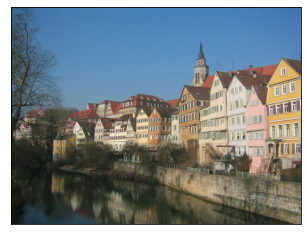

In [4]:
content = io.imread('img/content/tubingen.jpg')
content = T.rescale(content, (0.5, 0.5, 1), preserve_range=True).astype('uint8')
ax = plt.imshow(content)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

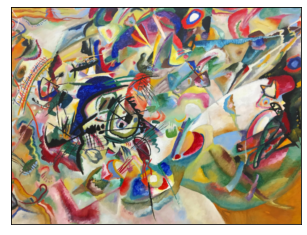

In [5]:
style = io.imread('img/styles/composition-vii.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [6]:
def stylize(iterations: int, content_layer_name: str):
    """
    Stylize the image.

    Args:
        iterations: the number of iterations to optimize
        content_layer_name: the name of the content layer to use

    Returns: 
        a stylized image

    """
    img = Stylizer(content_weight=1, style_weight=1e4, content_layer_name=content_layer_name)(
        content=content,
        style=style,
        optimize=L_BFGS(max_evaluations=20),
        iterations=iterations,
        callback=build_callback('build/content-layer-selection/{}'.format(content_layer_name))
    )
    io.imsave('img/layer-content/{}.png'.format(content_layer_name), img)

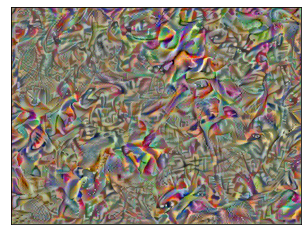

100%|██████████| 100/100 [00:30<00:00,  3.23it/s]


In [7]:
stylize(ITERATIONS, 'block1_conv1')

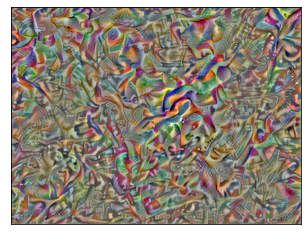

100%|██████████| 100/100 [00:26<00:00,  3.76it/s]


In [8]:
stylize(ITERATIONS, 'block2_conv1')

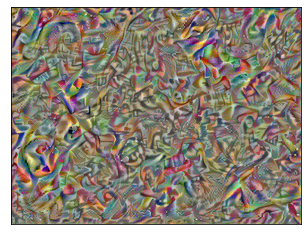

100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


In [9]:
stylize(ITERATIONS, 'block3_conv1')

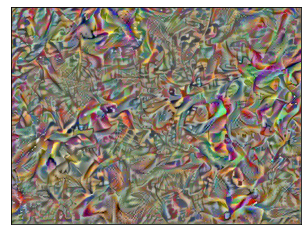

100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


In [10]:
stylize(ITERATIONS, 'block4_conv1')

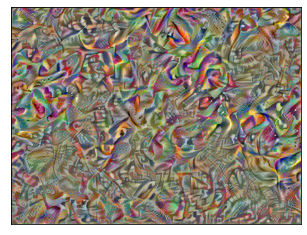

100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


In [11]:
stylize(ITERATIONS, 'block5_conv1')